# Modelo para cálculo de imóveis na cidade de São Paulo

O objetivo deste projeto é construir um modelo preditivo capaz de calcular o preço de um imóvel no bairro Paraíso na cidade de São Paulo. 

Para completar este projeto cada aluno deverá seguir as orientações que estão neste notebook e preencher as células vazias. 

# Aquisição, pré-processamento e análise descritiva

In [1]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/20140917_imoveis_filtrados_final.csv_shaped.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [2]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


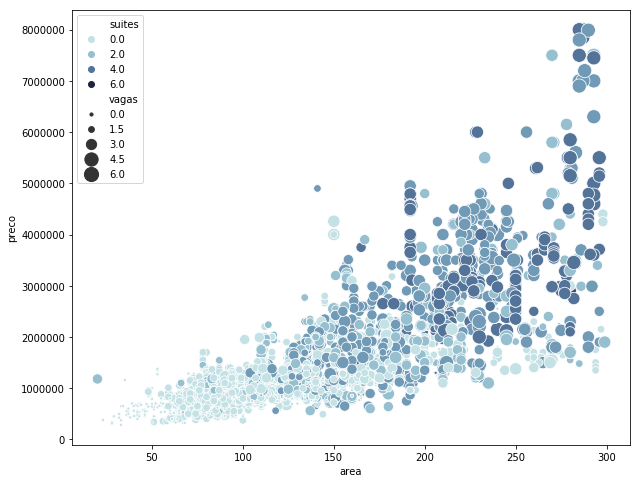

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

* Listar a quantidade de imóveis por bairro existente no dataset

In [4]:
# @hidden_cell
df['<PREENCHER>'].value_counts()

vila-mariana           1714
paraiso                 809
vila-nova-conceicao     794
vila-sonia              314
perto_ibirapuera        129
Name: bairro, dtype: int64

* Considere apenas os imóveis do bairo paraiso

In [5]:
# @hidden_cell
df = df[df['bairro'] == 'paraiso']

* Depois de considerar apenas os imóveis do bairro vila-nova-conceicao o tamanho do dataset precisa ser exatamente igual a: 

In [6]:
df.shape

(809, 7)

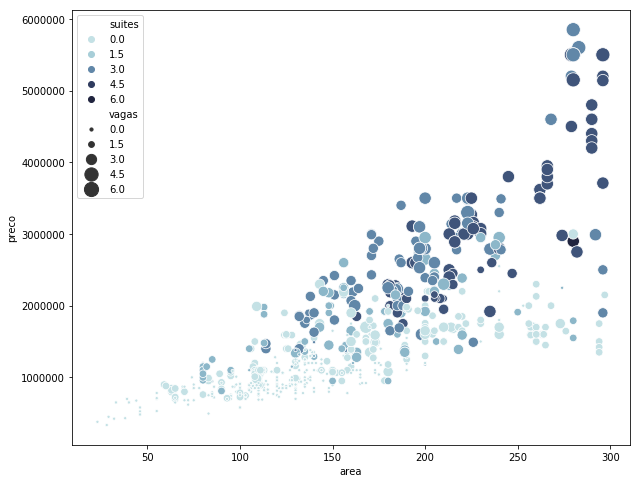

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [8]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
794,paraiso,2400000.0,213.0,4.0,4.0,6.0,3.0
795,paraiso,530000.0,55.0,1.0,2.0,2.0,1.0
796,paraiso,1450000.0,157.0,2.0,3.0,4.0,2.0
797,paraiso,1070000.0,135.0,1.0,3.0,2.0,1.0
798,paraiso,2100000.0,210.0,4.0,4.0,5.0,2.0


* A quantidade suites não pode ser maior que a quantidade de dormitórios e a quantidade de suites também não pode ser maior que a quantidade de banheiros. Exclua todos os exemplos que não satisfazem esta restrição. Estes exemplos provavelmente são erros de coleta de dados.

In [9]:
# @hidden_cell
df = df[df['suites'] <= df['dormitorios']]
df = df[df['suites'] <= df['banheiros']]

* Depois deste filtro o dataset precisa ter o tamanho abaixo: 

In [10]:
df.shape

(786, 7)

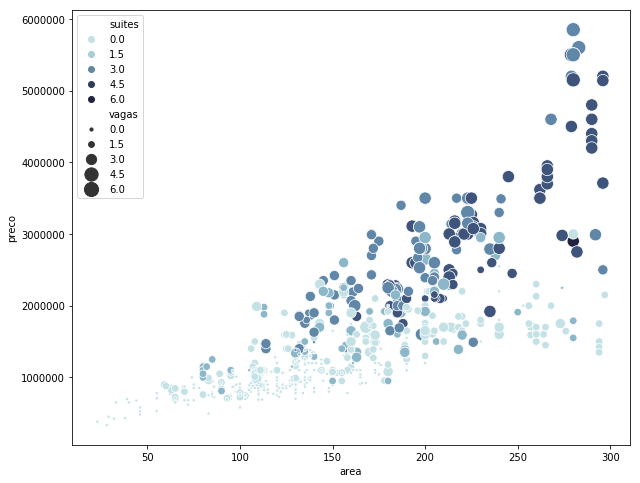

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

* Visto que agora a variável bairro tem apenas um valor, você deve remover a mesma

In [12]:
# @hidden_cell
df = df.drop(columns=['bairro'])

* Depois deste filtro o dataset precisa ter a seguinte estrutura:

In [13]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas
794,2400000.0,213.0,4.0,4.0,6.0,3.0
795,530000.0,55.0,1.0,2.0,2.0,1.0
796,1450000.0,157.0,2.0,3.0,4.0,2.0
797,1070000.0,135.0,1.0,3.0,2.0,1.0
798,2100000.0,210.0,4.0,4.0,5.0,2.0


* Qual é o valor mínimo e máximo dos preços dos imóveis? 

In [ ]:
# @hidden_cell
x = df['<PREENCHER>'].describe()
x

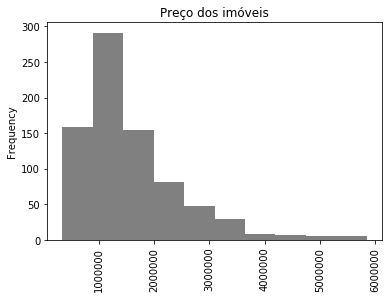

In [14]:
df['preco'].plot(kind='hist', color='gray', title='Preço dos imóveis', rot=90)

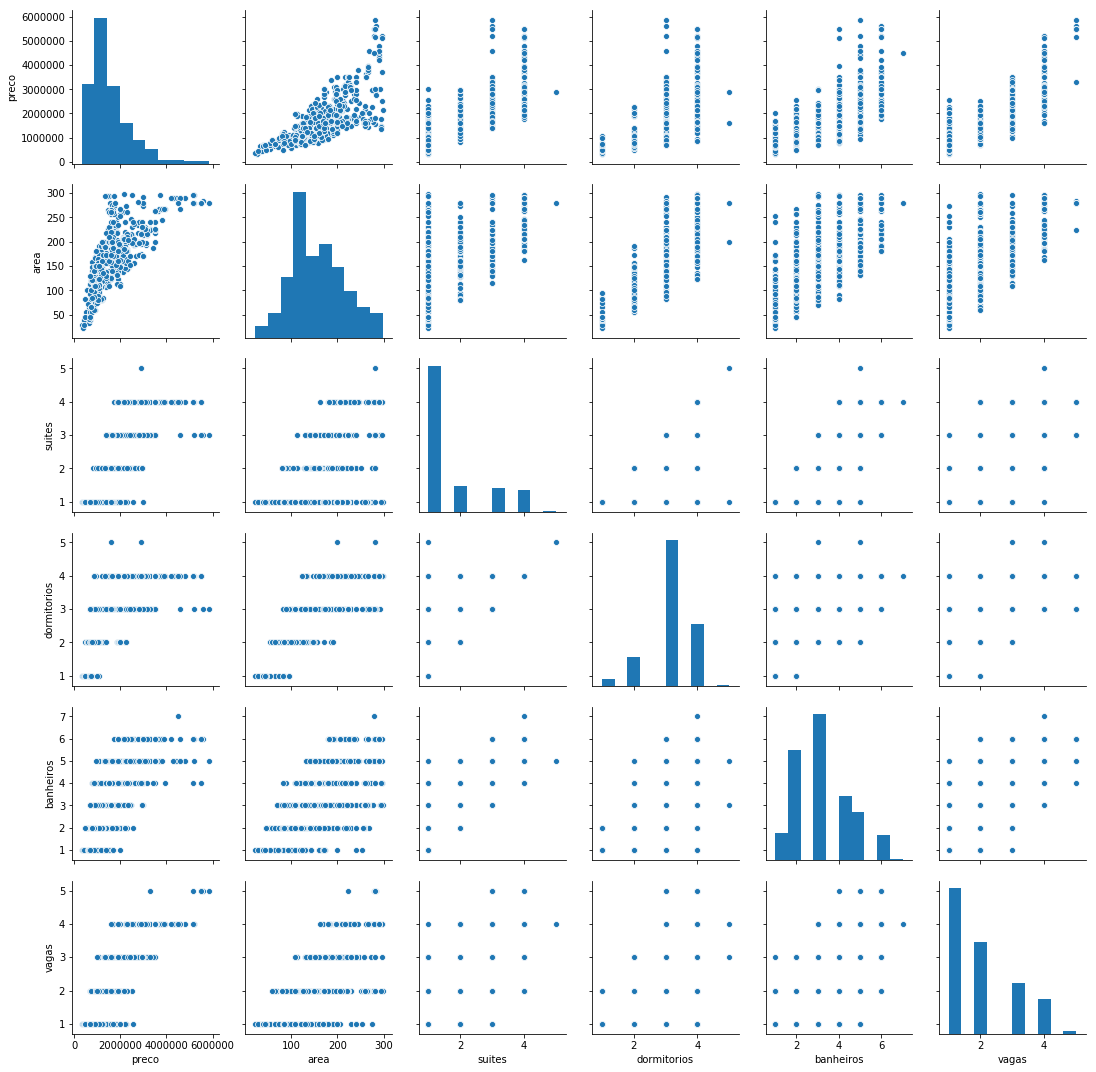

In [15]:
import seaborn as sns
sns.pairplot(df)

In [16]:
df.corr()

,preco,area,suites,dormitorios,banheiros,vagas
preco,1.000000,0.762753,0.772611,0.496607,0.699356,0.831578
area,0.762753,1.000000,0.515171,0.689718,0.575139,0.631188
suites,0.772611,0.515171,1.000000,0.425713,0.770448,0.787208
dormitorios,0.496607,0.689718,0.425713,1.000000,0.533613,0.460330
banheiros,0.699356,0.575139,0.770448,0.533613,1.000000,0.691970
vagas,0.831578,0.631188,0.787208,0.460330,0.691970,1.000000


# Divisão dos datasets

In [17]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas
794,2400000.0,213.0,4.0,4.0,6.0,3.0
795,530000.0,55.0,1.0,2.0,2.0,1.0
796,1450000.0,157.0,2.0,3.0,4.0,2.0
797,1070000.0,135.0,1.0,3.0,2.0,1.0
798,2100000.0,210.0,4.0,4.0,5.0,2.0


* dividindo o dataset em 80% para treino e 20% para teste

In [18]:
# neste código você precisa informar o percentual de exemplos que serão utilizados no teste

percentual = #<PREENCHER>

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:6], df['preco'], test_size=percentual, random_state=4)

In [19]:
x_train.head()

,area,suites,dormitorios,banheiros,vagas
1349,137.0,1.0,3.0,3.0,1.0
1069,120.0,1.0,3.0,3.0,1.0
1456,82.0,2.0,2.0,4.0,2.0
1449,226.0,4.0,4.0,5.0,4.0
1532,172.0,1.0,3.0,2.0,2.0


# Criação e avaliação do modelo preditivo

Crie um modelo de regressão utilizando os algoritmos e transformações nos atributos que você considera mais adequados.

Valide o modelo desenvolvido considerando os datasets X_test e y_test. Espera-se que o erro médio absoluto seja inferior a duzentos mil reais (R$ 200.000,00). 

Descreva nas células abaixo todas as etapas necessárias para o desenvolvimento e validação do modelo.

## Regressão Linear

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(628, 5)
(628,)
(158, 5)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

### Validação do modelo no conjunto de treinamento

In [22]:
predicted = model.predict(x_train)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 150142973325.56418
r2 = % 0.8223876116718476
mae = % 265630.1450275685


Text(0.5, 1.0, 'Análise dos erros')

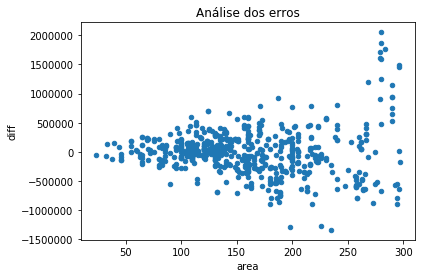

In [24]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

In [25]:
predicted = model.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 96552254398.05544
r2 = % 0.8343976815354153
mae = % 241653.0923112497


Text(0.5, 1.0, 'Análise dos erros')

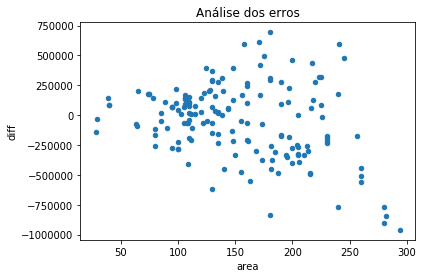

In [27]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

## Regressão Linear com transformação polinomial

**Testar com degree igual a 2, 3, 4 e 8. Analisar possível overfitting**

In [28]:
#Generate a new feature matrix consisting of all polynomial combinations 
#of the features with degree less than or equal to the specified degree. 
#For example, if an input sample is two dimensional and of the form [a, b], 
#the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=<PREENCHER>, include_bias=False)
transformer.fit(x_train)
train_ = transformer.transform(x_train)

In [29]:
print(x_train.shape)
print(train_.shape)

(628, 5)
(628, 55)


* Por que este dataset tem dimensões diferentes? 

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_, y_train)

### Validação do modelo no conjunto de treinamento

In [31]:
predicted = model.predict(train_)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 74308954515.18869
r2 = % 0.9120958470897451
mae = % 195114.52710882452


Text(0.5, 1.0, 'Análise dos erros')

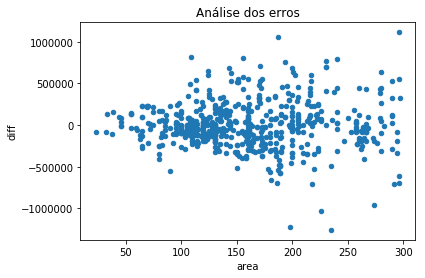

In [33]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

* antes de usar a função predict, você precisa aplicar a mesma transformação feita sobre o dataset x_train no dataset x_test. Preste atenção que o nome da variável esperada é test_

In [34]:
# @hidden_cell
transformer.fit(x_test)
test_ = transformer.transform(x_test)

In [35]:
predicted = model.predict(test_)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 98395324184.91254
r2 = % 0.8312365266592459
mae = % 226014.80312636495


Text(0.5, 1.0, 'Análise dos erros')

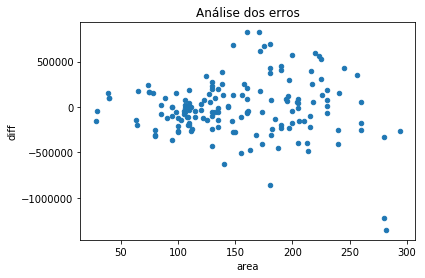

In [37]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

## Random Forest sem modificação adicional de atributos e modificando apenas a quantidade de árvores

In [38]:
from sklearn.ensemble import RandomForestRegressor
results = pd.DataFrame(columns=['estimators','r2'])
for i in range(100, 5000, 100):
    clf = RandomForestRegressor(n_estimators=i, max_depth=None, random_state=4, oob_score=True)
    clf.fit(x_train, y_train)
    results = results.append({'estimators':i, 'r2': clf.oob_score_}, ignore_index=True)

Text(0.5, 1.0, 'Relação R2 com a quantidade de árvores utilizadas no modelo RandomForest')

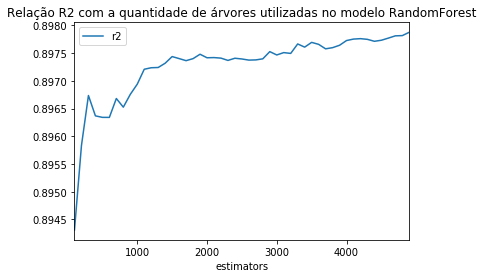

In [39]:
ax = results.plot(x='estimators', y='r2')
ax.set_title('Relação R2 com a quantidade de árvores utilizadas no modelo RandomForest')

* o modelo com 4900 árvores é o modelo com melhor $R^{2}$

In [40]:
clf = RandomForestRegressor(n_estimators=4900, max_depth=None, random_state=4, oob_score=True)

* crie o modelo usando a função fit é os datasets x_train e y_train

In [41]:
# @hidden_cell
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=4900, n_jobs=None,
           oob_score=True, random_state=4, verbose=0, warm_start=False)

* Nível de importância dos atributos para o modelo preditivo: 

In [42]:
print(clf.oob_score_)
print(clf.feature_importances_)
print(x_train.columns)

0.8978754005039717
[0.33587576 0.18957595 0.01128215 0.01847831 0.44478783]
Index(['area', 'suites', 'dormitorios', 'banheiros', 'vagas'], dtype='object')


### Validação do modelo no conjunto de treinamento

In [43]:
predicted = clf.predict(x_train)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 17129486081.04796
r2 = % 0.9797365879581209
mae = % 85139.64129551344


Text(0.5, 1.0, 'Análise dos erros')

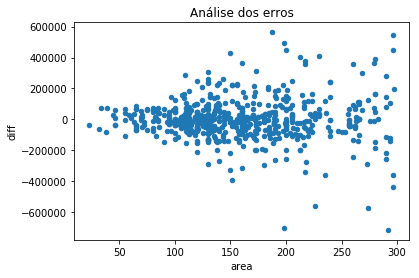

In [45]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

* utilize a função predict para calcular os valores preditos considerando o dataset x_test

In [46]:
# @hidden_cell
predicted = clf.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 97394256154.57993
r2 = % 0.8329535159496295
mae = % 185737.0869829423


Text(0.5, 1.0, 'Análise dos erros')

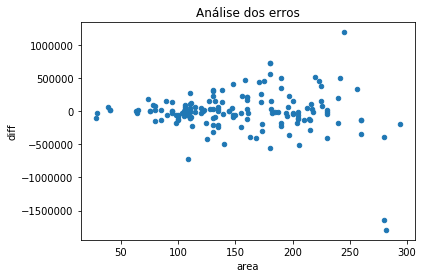

In [48]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

## Random Forest sem modificação adicional de atributos e com GridSearch

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2', 3, 4, 5],
    'max_depth' : [2, 10, 20, 100, None]
}
rfc=RandomForestRegressor(random_state=4)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose=1, n_jobs=-1)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  4.7min finished


{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}

In [52]:
clf2 = RandomForestRegressor(n_estimators=1000, max_features = 'sqrt', max_depth=10, random_state=4, oob_score=True)
clf2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=True, random_state=4, verbose=0, warm_start=False)

In [53]:
print(clf2.oob_score_)
print(clf2.feature_importances_)
print(x_train.columns)

0.9042640694388276
[0.33767208 0.21645386 0.02002816 0.08581751 0.34002839]
Index(['area', 'suites', 'dormitorios', 'banheiros', 'vagas'], dtype='object')


### Validação do modelo no conjunto de treinamento

In [54]:
predicted = clf2.predict(x_train)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 20997741374.45144
r2 = % 0.9751606158289781
mae = % 103187.80384888209


Text(0.5, 1.0, 'Análise dos erros')

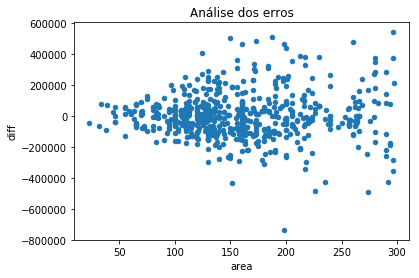

In [56]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

In [57]:
predicted = clf2.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 84549393898.26898
r2 = % 0.8549844771453545
mae = % 184575.05398685098


Text(0.5, 1.0, 'Análise dos erros')

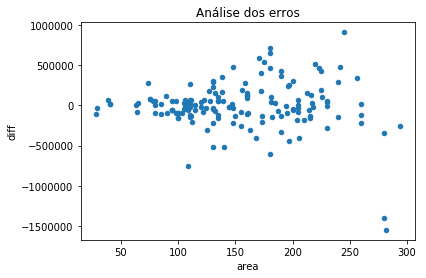

In [58]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

## Random Forest com transformacao polinomial

In [59]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(x_train)
train_ = transformer.transform(x_train)

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['sqrt', 'log2', 3, 4, 5, 6],
    'max_depth' : [2, 10, 20, 100, None]
}
rfc=RandomForestRegressor(random_state=4)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose=1, n_jobs=-1)
CV_rfc.fit(train_, y_train)
CV_rfc.best_params_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  7.1min finished


{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}

In [61]:
clf3 = RandomForestRegressor(n_estimators=100, max_features = 'sqrt', max_depth=20, random_state=4, oob_score=True)
clf3.fit(train_, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=4, verbose=0, warm_start=False)

In [64]:
print(clf3.oob_score_)

0.895218562969256


### Validação do modelo no dataset de treinamento

In [65]:
predicted = clf3.predict(train_)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_train, predicted)
r2 = r2_score(y_train, predicted)
mae = mean_absolute_error(y_train, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 17329464386.708202
r2 = % 0.9795000226118018
mae = % 86952.7336179596


Text(0.5, 1.0, 'Análise dos erros')

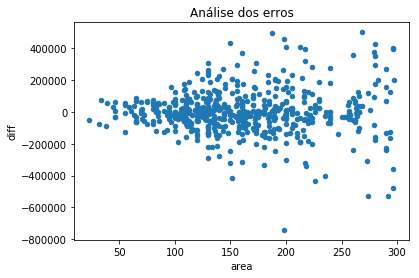

In [67]:
resultado = pd.DataFrame({'real': y_train, 'predicted': predicted, 'diff': (y_train - predicted)})
resultado = pd.concat([x_train, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Validação do modelo no conjunto de teste

In [68]:
transformer.fit(x_test)
test_ = transformer.transform(x_test)

In [69]:
predicted = clf3.predict(test_)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
print('rmse = %', rmse)
print('r2 = %', r2)
print('mae = %', mae)

rmse = % 96935888542.1014
r2 = % 0.8337396885751032
mae = % 188758.1074020728


Text(0.5, 1.0, 'Análise dos erros')

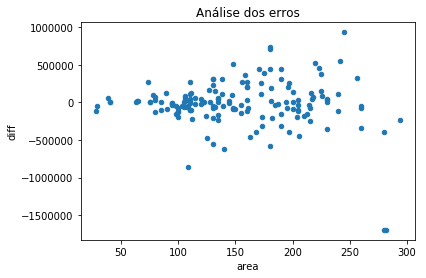

In [70]:
resultado = pd.DataFrame({'real': y_test, 'predicted': predicted, 'diff': (y_test - predicted)})
resultado = pd.concat([x_test, resultado], axis=1)
ax = resultado.plot(x='area', y='diff', kind='scatter')
ax.set_title('Análise dos erros')

### Analisando os dois imóveis com erros altos no conjunto de teste

In [73]:
temp = resultado[resultado['diff'] < -1000000]
temp

,area,suites,dormitorios,banheiros,vagas,real,predicted,diff
879,280.0,5.0,5.0,5.0,4.0,2900000.0,4.597154e+06,-1.697154e+06
1082,282.0,4.0,4.0,5.0,4.0,2750000.0,4.446515e+06,-1.696515e+06


# Análise dos resultados

As abordagens testadas e os seus respectivos resultados são apresentados abaixo: 

| Modelos                                                | MAE        |
|--------------------------------------------------------|------------|
| Regressão linear                                       | 241,653.10 |
| Regressão Linear com transformação polinomial          | 226.014,80 |
| RandomForest com 4.900 árvores                         | 185.737,09 |
| RandomForest com GridSearch                            | 184.575,06 |
| RandomForest com GridSearch e transformação polinomial | 188.758,11 |

* verifique se os valores estão corretos, e;
* considerando os valores apresentados na tabela, qual é o melhor modelo? 